# Simulação do Sistema em Malha Fechada

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

In [4]:
# dados = np.load(r"C:\Users\Windows 10\OneDrive\Área de Trabalho\Victor\ensaio_principal.npy")
# dados = np.load(r"condigos_emanuel/ensaio_principal.npy")
dados = np.load(r"C:\Users\Windows 10\OneDrive\Área de Trabalho\Victor\ensaio_principal-cleison.npy")
tempo = dados[:, 0]
r = dados[:, 1]
y = dados[:, 2]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Windows 10\\OneDrive\\Área de Trabalho\\Victor\\ensaio_principal-cleison.npy'

#### Função de Transferência do Sistema

In [ ]:
Km = 0.575
tau = 0.104

Gs = ct.tf([Km], [tau, 1])

#### Resposta ao degrau do sistema em malha aberta

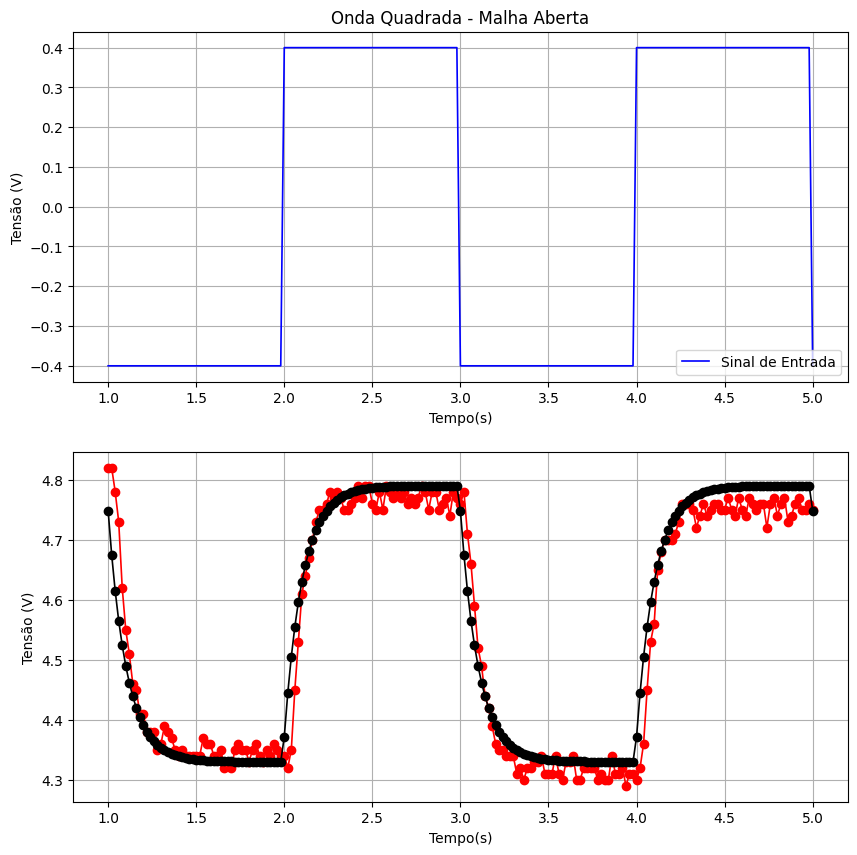

4.51408


In [ ]:
# Resposta ao Degrau Unitário G(s)

sinal_de_entrada = r - 5.5

_, y_modelo = ct.forced_response(Gs, T=tempo, U= sinal_de_entrada)

y_modelo = y_modelo + 4.56

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(tempo[(tempo>1) & (tempo<5)], sinal_de_entrada[(tempo>1) & (tempo<5)], '-b', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.title('Onda Quadrada - Malha Aberta')
plt.legend(loc='lower right', labels=('Sinal de Entrada','Sinal de Saída'))

plt.subplot(212)
#plt.plot(tempo,r,'-b',tempo,y,'-r',linewidth=1.2)
plt.plot(tempo[(tempo>1) & (tempo<5)], y[(tempo>1) & (tempo<5)], '-ro', tempo[(tempo>1) & (tempo<5)], y_modelo[(tempo>1) & (tempo<5)], '-ko', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
# plt.title('Tensão de Saída - Malha Aberta')
plt.show()

print(np.mean(y[tempo>1]))

#### Controlador Proporcional

In [ ]:
# Ganho do Controlador Proporcional
kp = 50

Cp = kp
# Função de Transferência do controlador Proporcional
# Cp = ct.tf([kp], [0, 1])
Cp

50

Resposta ao degrau do sistema em malha fechada com controlador proporcional

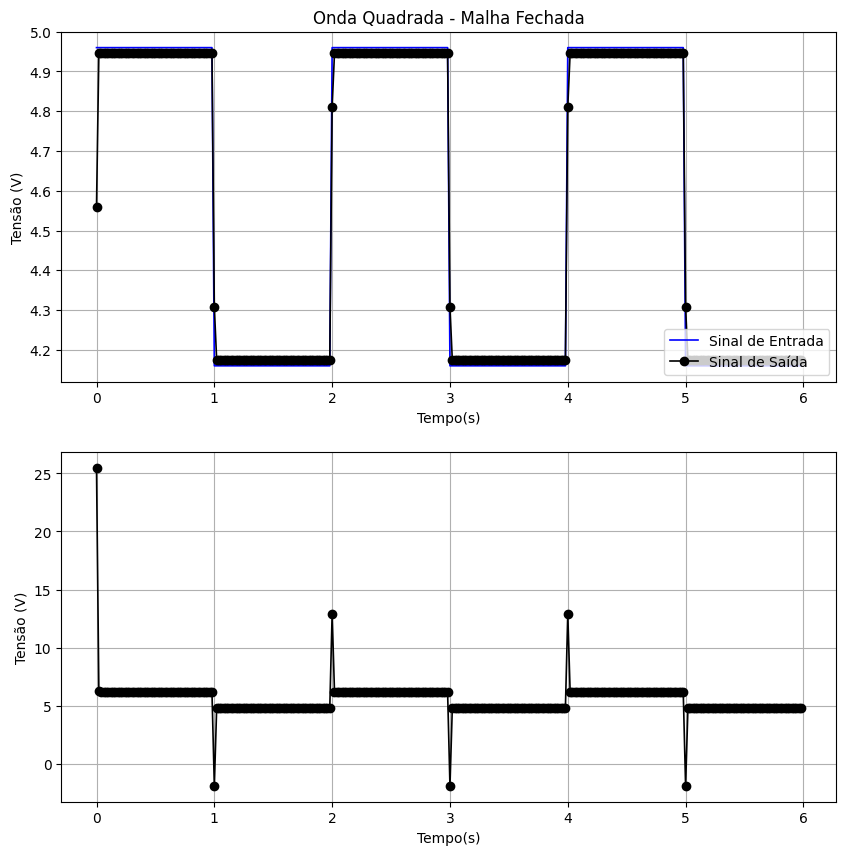

In [ ]:
sinal_de_referencia = sinal_de_entrada
# Função de Transferência de Malha direta
Fs = ct.series(Cp, Gs)

# Função de Transferência de Malha Fechada
Gs_mf = ct.feedback(Fs, 1, sign=-1)
Gs_mf

_, y_modelo_mf = ct.forced_response(Gs_mf, T=tempo, U=sinal_de_referencia)

# Gerar Sinal de Controle
Cs_mf = ct.feedback(Cp, Gs, sign=-1)
_,sinal_controle_mf = ct.forced_response(Cs_mf, T=tempo, U=sinal_de_referencia)

sinal_controle_mf = sinal_controle_mf + 5.5


plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(tempo, sinal_de_referencia + 4.56, '-b',tempo, y_modelo_mf + 4.56, '-ko', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.title('Onda Quadrada - Malha Fechada')
plt.legend(loc='lower right', labels=('Sinal de Entrada','Sinal de Saída'))

plt.subplot(212)
#plt.plot(tempo,r,'-b',tempo,y,'-r',linewidth=1.2)
plt.plot(tempo, sinal_controle_mf, '-ko', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
# plt.title('Tensão de Saída - Malha Aberta')
plt.show()

<br>

### Controle Proporcional Integral


In [5]:
# Ganhos do Controlador Proporcional Integral
Kp = 2
Ki = 50

# Função de Transferência do controlador Proporcional Integral
Cpi = ct.tf([Kp , Ki], [1, 0])
print(Cpi)




2 s + 50
--------
   s



Resposta ao degrau do sistema em malha fechada com controlador porporcional integral

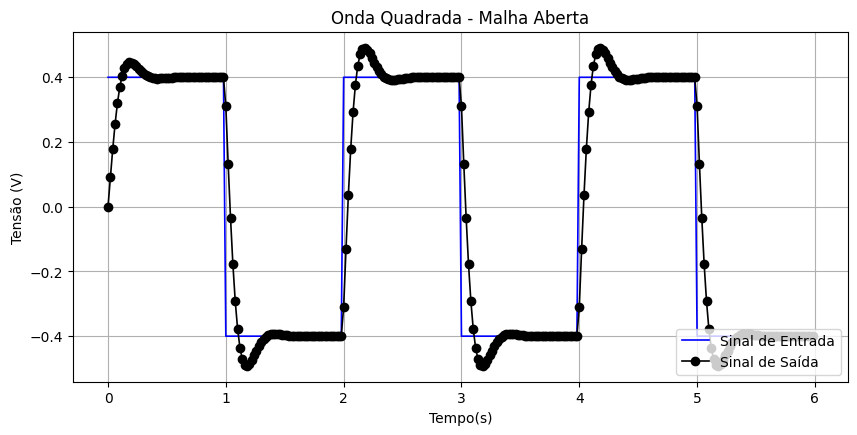

In [ ]:
# Função de Transferência de Malha direta
Hs = ct.series(Cpi, Gs)

# Função de Transferência de Malha Fechada
Gs_mf2 = ct.feedback(Hs, 1, sign=-1)
Gs_mf2


_, y_modelo_pi = ct.forced_response(Gs_mf2, T=tempo, U=sinal_de_referencia)

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(tempo, sinal_de_referencia, '-b', tempo, y_modelo_pi, '-ko', linewidth=1.2)
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.title('Onda Quadrada - Malha Aberta')
plt.legend(loc='lower right', labels=('Sinal de Entrada','Sinal de Saída'))

# plt.subplot(212)
# #plt.plot(tempo,r,'-b',tempo,y,'-r',linewidth=1.2)
# plt.plot(tempo, y, '-ro', tempo, y_modelo, '-ko', linewidth=1.2)
# plt.xlabel('Tempo(s)')
# plt.ylabel('Tensão (V)')
# plt.grid()
# # plt.title('Tensão de Saída - Malha Aberta')
# plt.show()

In [6]:
from control.matlab import c2d

In [9]:
Cpiz = c2d(Cpi, Ts=0.02, method="tustin")
Cpiz

TransferFunction(array([ 2.5, -1.5]), array([ 1., -1.]), 0.02)